In [ ]:
from mlxtend.data import iris_data
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
X, y = iris_data()

In [ ]:
np.bincount(y)

array([50, 50, 50])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = None, random_state=108)
print(np.bincount(y_train))
print(np.bincount(y_test))

[26 36 43]
[24 14  7]


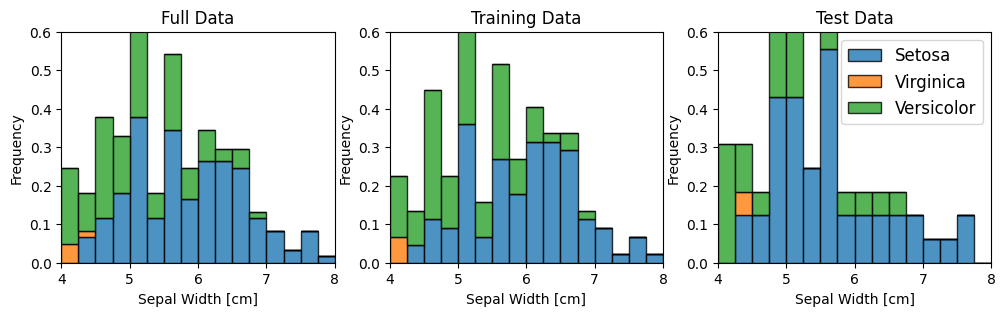

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

for ax, (X, y, title) in zip(axes, [(X, y, "Full Data"), (X_train, y_train, "Training Data"), (X_test, y_test, "Test Data")]):
    ax.hist(X, histtype="barstacked", edgecolor = 'black',
                label=y, alpha=0.8, density=True,
                bins=np.arange(4.0, 8.1, 0.25))
    ax.set_ylim([0, 0.6])
    ax.set_xlim([4, 8])
    ax.set_xlabel('Sepal Width [cm]')
    ax.set_ylabel('Frequency')
    ax.set_title(title)
    plt.legend(['Setosa', 'Virginica', 'Versicolor'], fontsize=12)


plt.show()

In [ ]:
X, y = iris_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(np.bincount(y_train))
print(np.bincount(y_test))

[35 35 35]
[15 15 15]


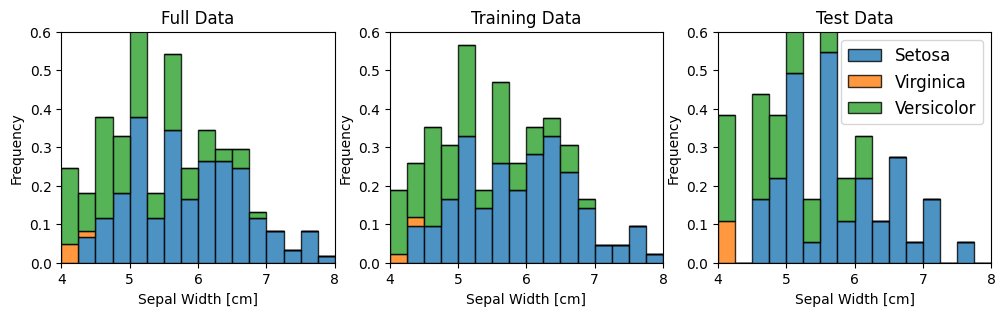

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

for ax, (X, y, title) in zip(axes, [(X, y, "Full Data"), (X_train, y_train, "Training Data"), (X_test, y_test, "Test Data")]):
    ax.hist(X, histtype="barstacked", edgecolor = 'black',
                label=y, alpha=0.8, density=True,
                bins=np.arange(4.0, 8.1, 0.25))
    ax.set_ylim([0, 0.6])
    ax.set_xlim([4, 8])
    ax.set_xlabel('Sepal Width [cm]')
    ax.set_ylabel('Frequency')
    ax.set_title(title)
    plt.legend(['Setosa', 'Virginica', 'Versicolor'], fontsize=12)


plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

def compute_accuracy(stratified=False, random_state = None):
    X, y = iris_data()
    X = X[:, :2]
    if stratified:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=random_state)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=None, random_state=random_state)
    logreg = LogisticRegression(C=1e5) # large C essentially removes regularization
    logreg.fit(X_train, y_train)
    pred = logreg.predict(X_test)
    accuracy = sum(int(y_hat == yi) for y_hat, yi in zip(pred, y_test)) / len(y_test)
    return accuracy

In [ ]:
num_experiments = 30
z = 1.96

accuracies = [compute_accuracy(random_state=185) for _ in range(num_experiments)]
mean_acc = np.mean(accuracies)
n = len(accuracies)

var_acc = (1/n)*mean_acc*(1 - mean_acc)
std_acc = np.sqrt(var_acc)

ci_lower = mean_acc - z*(std_acc / np.sqrt(n))
ci_upper = mean_acc + z*(std_acc / np.sqrt(n))

# Stratified
accuracies_s = [compute_accuracy(stratified=True, random_state=185) for _ in range(num_experiments)]
mean_acc_s = np.mean(accuracies_s)
n_s = len(accuracies_s)

var_acc_s = (1/n)*mean_acc_s*(1 - mean_acc_s)
std_acc_s = np.sqrt(var_acc_s)

ci_lower = mean_acc - z*(std_acc / np.sqrt(n))
ci_upper = mean_acc + z*(std_acc / np.sqrt(n))

ci_lower_s = mean_acc_s - z*(std_acc_s / np.sqrt(n))
ci_upper_s = mean_acc_s + z*(std_acc_s / np.sqrt(n))


print(f"Mean accuracy: {mean_acc}")
print(f"95% confidence interval: ({ci_lower}, {ci_upper})")
print(f"Mean accuracy (stratified): {mean_acc_s}")
print(f"95% confidence interval (stratified): ({ci_lower_s}, {ci_upper_s})")

Mean accuracy: 0.7111111111111114
95% confidence interval: (0.6814990274173577, 0.740723194804865)
Mean accuracy (stratified): 0.8444444444444446
95% confidence interval (stratified): (0.8207654573308237, 0.8681234315580654)
